# Extract

In [73]:
import pandas as pd

In [74]:
import matplotlib.pyplot as plt

In [ ]:
joined_data=pd.read_csv('joined_dataset.csv')

In [39]:
joined_data.rename(columns=lambda x: x.strip() ,inplace=True) #get rid of unnecesary space 

In [40]:
joined_data.columns

Index(['Unnamed: 0', 'DOS ID', 'Current Entity Name',
       'Initial DOS Filing Date', 'County', 'Jurisdiction', 'Entity Type',
       'DOS Process Name', 'DOS Process Address 1', 'DOS Process Address 2',
       'DOS Process City', 'DOS Process State', 'DOS Process Zip', 'CEO Name',
       'CEO Address 1', 'CEO Address 2', 'CEO City', 'CEO State', 'CEO Zip',
       'Registered Agent Name', 'Registered Agent Address 1',
       'Registered Agent Address 2', 'Registered Agent City',
       'Registered Agent State', 'Registered Agent Zip', 'Location Name',
       'Location Address 1', 'Location Address 2', 'Location City',
       'Location State', 'Location Zip', 'month', 'day', 'year', 'Area',
       'Year', 'Month', 'Labor Force', 'Employed', 'Unemployed',
       'Unemployment Rate'],
      dtype='object')

# Distribution of number of unique DOS IDs over time

In [41]:
type(joined_data.groupby('year')['DOS ID'].nunique())

pandas.core.series.Series

In [42]:
number_of_dos = joined_data.groupby('year')['DOS ID'].nunique().values

In [43]:
years =joined_data.groupby('year')['DOS ID'].nunique().index

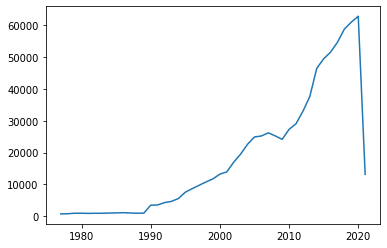

In [44]:
plt.plot(years,number_of_dos)
plt.show()

In [45]:
joined_data.columns

Index(['Unnamed: 0', 'DOS ID', 'Current Entity Name',
       'Initial DOS Filing Date', 'County', 'Jurisdiction', 'Entity Type',
       'DOS Process Name', 'DOS Process Address 1', 'DOS Process Address 2',
       'DOS Process City', 'DOS Process State', 'DOS Process Zip', 'CEO Name',
       'CEO Address 1', 'CEO Address 2', 'CEO City', 'CEO State', 'CEO Zip',
       'Registered Agent Name', 'Registered Agent Address 1',
       'Registered Agent Address 2', 'Registered Agent City',
       'Registered Agent State', 'Registered Agent Zip', 'Location Name',
       'Location Address 1', 'Location Address 2', 'Location City',
       'Location State', 'Location Zip', 'month', 'day', 'year', 'Area',
       'Year', 'Month', 'Labor Force', 'Employed', 'Unemployed',
       'Unemployment Rate'],
      dtype='object')

In [49]:
active_small_data =joined_data.drop(['Unnamed: 0','Area' ,'Current Entity Name', 'Initial DOS Filing Date', 'Jurisdiction', 
         'DOS Process Name','DOS Process Address 1', 'DOS Process Address 2', 
         'DOS Process City','DOS Process State',  'CEO Name', 'CEO Address 1', 
         'CEO Address 2', 'CEO City', 'CEO State','Registered Agent Name', 
         'Registered Agent Address 1','Registered Agent Address 2', 
         'Registered Agent City','Entity Type',
         'Location Zip','DOS Process Zip', 'CEO Zip', 'Registered Agent Zip',
         'Location State',
         'Registered Agent State', 'Location Name', 'day',
         'Location Address 1', 'Location Address 2', 'Location City',
        'Labor Force', 'Employed', 'Unemployed', 'Year', 'Month',
       'Unemployment Rate'], axis=1)

In [50]:
active_small_data.head()

,DOS ID,County,month,year
0,3211809,kings,5,2005
1,3203583,kings,5,2005
2,3199867,kings,5,2005
3,3211699,kings,5,2005
4,3212110,kings,5,2005


In [51]:
all_counties = list(set(active_small_data['County']))

In [52]:
year_county_count = active_small_data.groupby(by=['year', 'County'])['DOS ID'].nunique()
year_county_count = pd.DataFrame(year_county_count)

In [53]:
year_county_count.to_csv('year_county_count.csv')

In [54]:
year_month_county_count = active_small_data.groupby(by=['year', 'month','County'])['DOS ID'].nunique()
year_month_county_count = pd.DataFrame(year_month_county_count)

In [55]:
year_month_county_count.to_csv('year_month_county_count.csv')

In [56]:
county_year_month_count = active_small_data.groupby(by=['County','year', 'month'])['DOS ID'].nunique()
county_year_month_count = pd.DataFrame(county_year_month_count)

In [57]:
county_year_month_count.to_csv('county_year_month_count.csv')

Clinton County
Fulton County
Genesee County
Greene County
Hamilton County
New York County
Richmond County
Seneca County
Yates County

`Visualization`

In [75]:
import seaborn as sns
#import matplotlib.pyplot as plt

In [59]:
df=pd.read_csv('year_county_count.csv')

In [60]:
#fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
df = df[df["year"]>=1990]

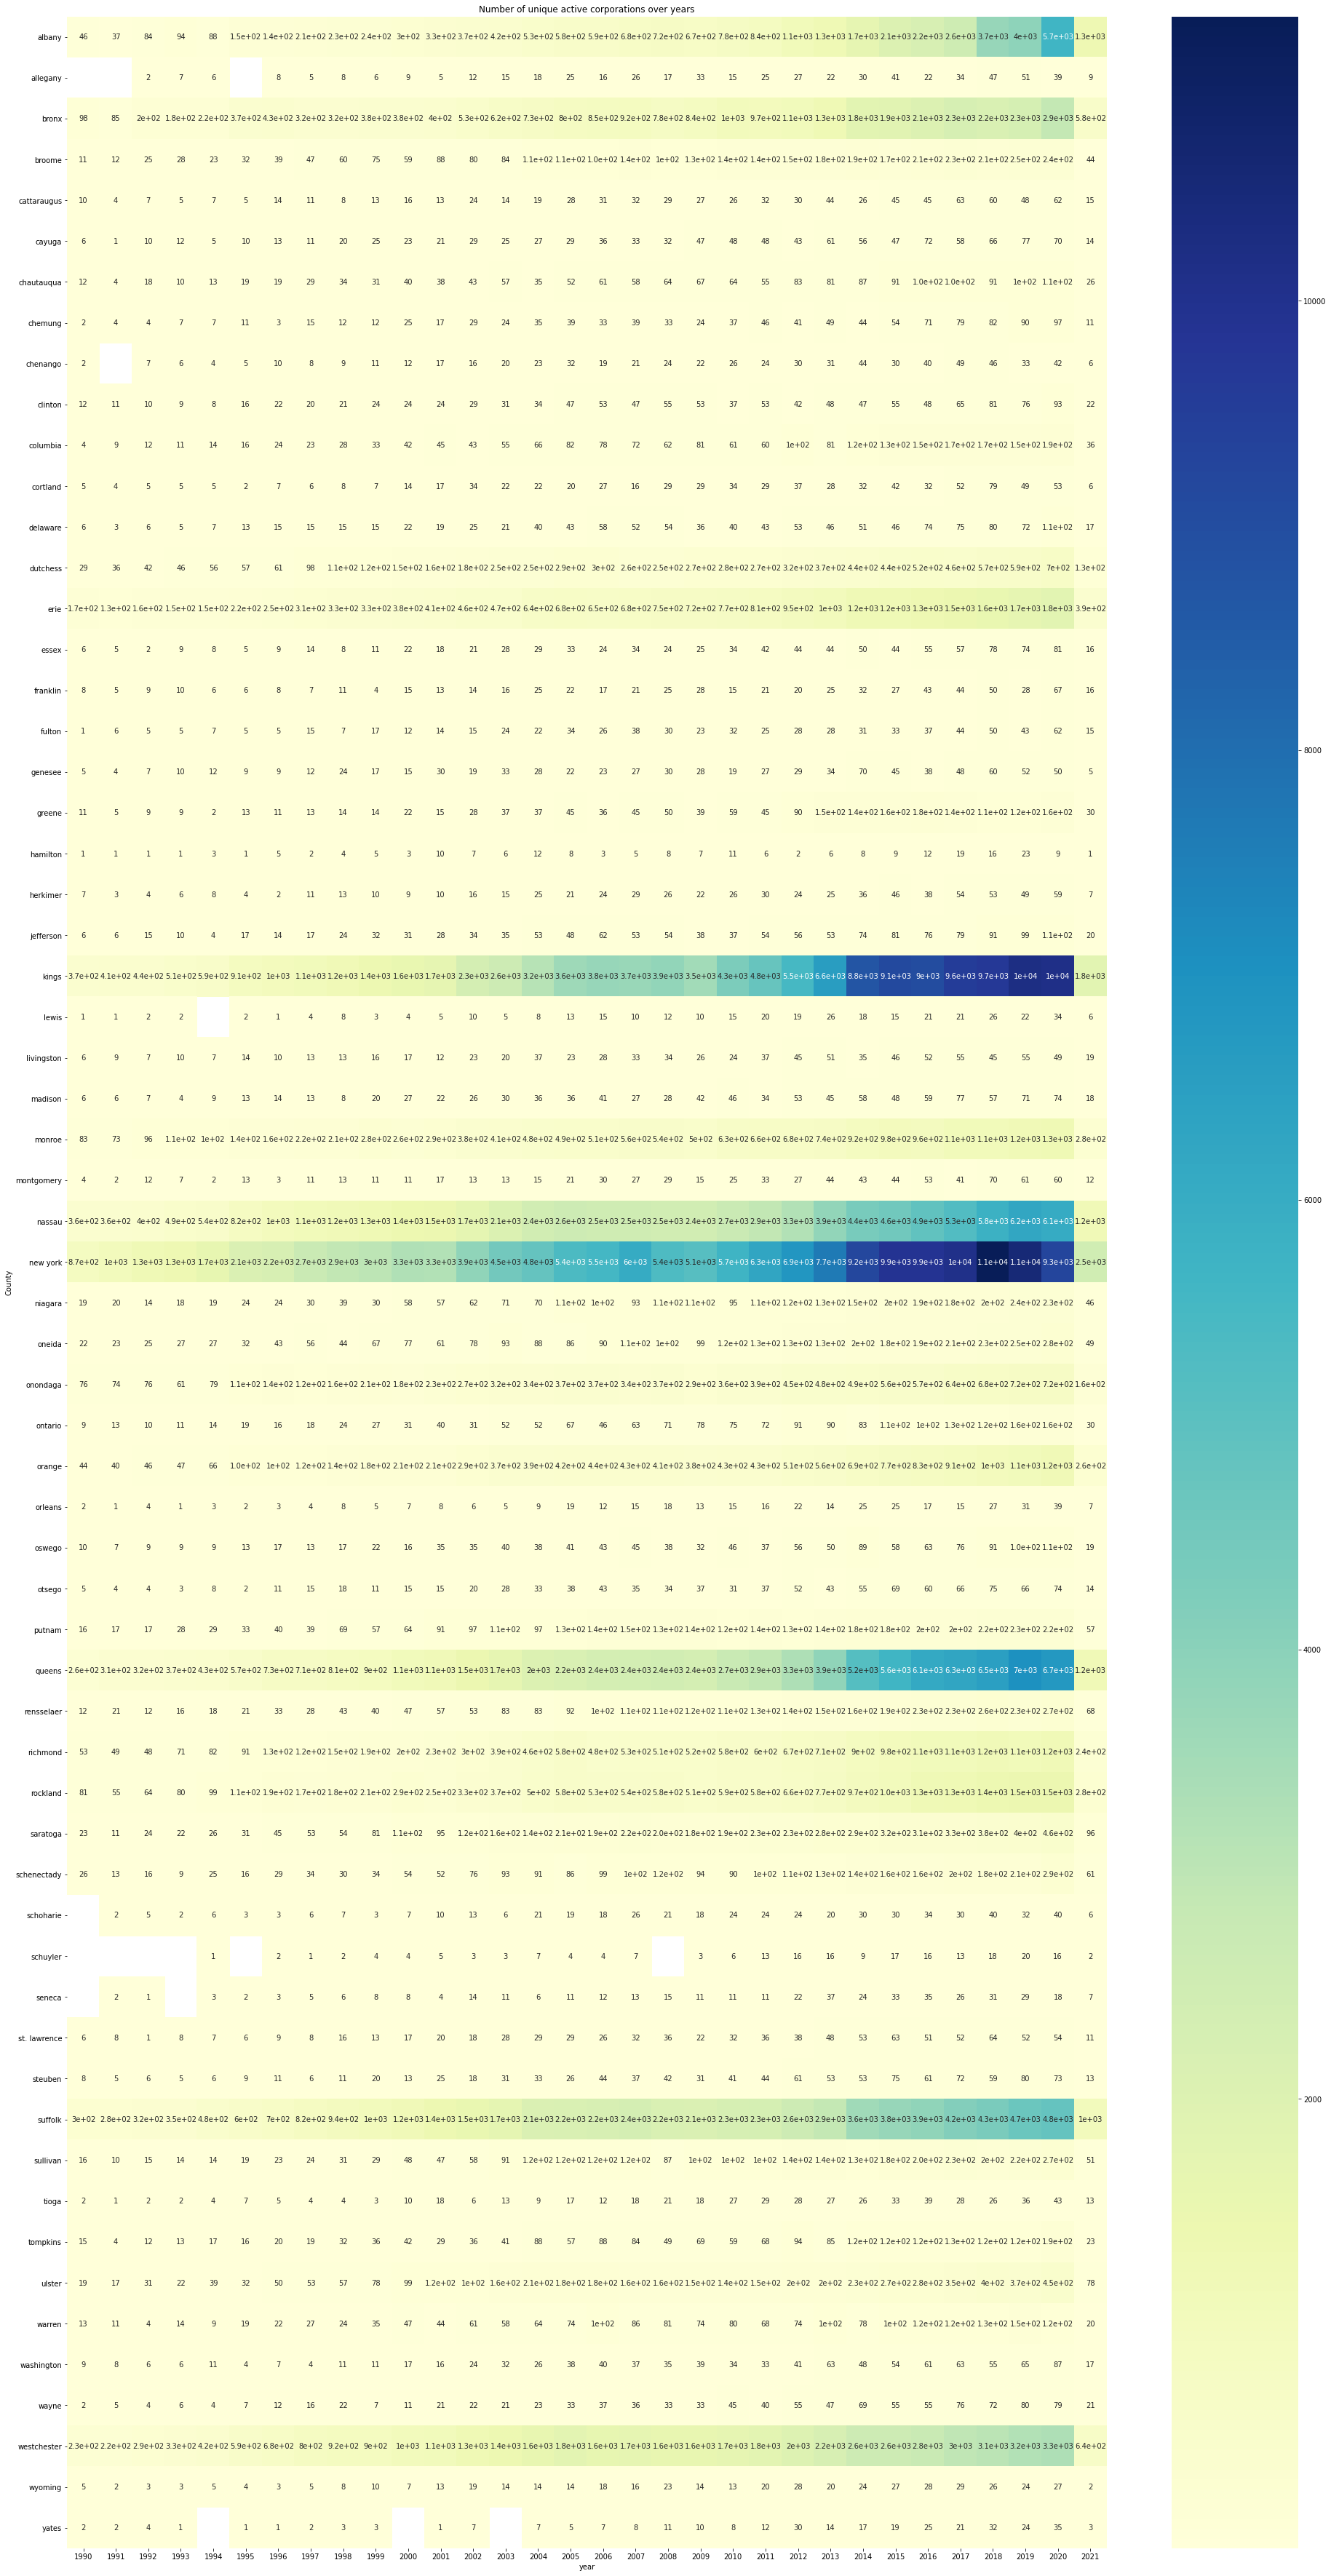

In [61]:
plt.figure(figsize = (32,64))
plt.title("Number of unique active corporations over years")
ax = sns.heatmap(df.pivot("County", "year", "DOS ID"),  cmap="YlGnBu", annot=True)

In [24]:
#jupyter nbextension enable --py widgetsnbextension

In [62]:
#import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [63]:
%matplotlib inline
from ipywidgets import interactive

In [64]:
df1=pd.read_csv('year_month_county_count.csv')

In [65]:
def plotting(year):
    plt.figure(figsize = (32,32))
    plt.title("Number of unique active corporations Year: "+str(year))
    dataframe = df1[df1["year"]==year]
    ax = sns.heatmap(dataframe.pivot("County", "month", "DOS ID"),  cmap="YlGnBu", annot=True)
    

In [66]:
interactive_plot = interact(plotting, year=[i for i in range(1990,2022,1)] )

interactive(children=(Dropdown(description='year', options=(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 19…

In [67]:
df2=pd.read_csv('county_year_month_count.csv')

In [68]:
def plotting2(county):
    plt.figure(figsize = (32,32))
    plt.title("Number of unique active corporations in "+str(county) + " county")
    dataframe = df1[df1["County"]==county]
    ax = sns.heatmap(dataframe.pivot("year", "month", "DOS ID"),  cmap="YlGnBu", annot=True)
    

In [69]:
interactive_plot = interact(plotting2, county=all_counties )

interactive(children=(Dropdown(description='county', options=('madison', 'genesee', 'chautauqua', 'herkimer', …